# Fraud Card Detection Project

## 📌 Project Description
This project aims to detect fraudulent credit card transactions using data analysis and machine learning techniques. Fraudulent activities in financial transactions are a major challenge, as they cause financial losses and reduce customer trust.  

The primary objective of the project is to build a predictive system that can accurately distinguish between legitimate and fraudulent transactions. This will help financial institutions identify suspicious activities early and take preventive actions.

In [5]:
!pip install kagglehub


In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kartik2112/fraud-detection")

print("Path to dataset files:", path)


Using Colab cache for faster access to the 'fraud-detection' dataset.
Path to dataset files: /kaggle/input/fraud-detection


## Import the Libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [8]:
plt.style.use('ggplot')
sns.set_palette("Set2")
%matplotlib inline


## Loading The Data

In [9]:
import pandas as pd
import os

data_path = "/kaggle/input/fraud-detection"


df_train = pd.read_csv(os.path.join(data_path, "fraudTrain.csv"), on_bad_lines="skip")
df_test  = pd.read_csv(os.path.join(data_path, "fraudTest.csv"), on_bad_lines="skip")


df = pd.concat([df_train, df_test], axis=0).reset_index(drop=True)

print("Combined shape:", df.shape)
df.head()


Combined shape: (1852394, 23)


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


## Exploratory Data Analysis (EDA)

In [10]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [11]:
df.dtypes

,0
Unnamed: 0,int64
trans_date_trans_time,object
cc_num,int64
merchant,object
category,object
amt,float64
first,object
last,object
gender,object
street,object


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud          


### 1. Dataset Overview
- **Total records:** 1,852,394 transactions  
- **Total columns:** 23 features  
- **Target column:** `is_fraud` (binary indicator: 0 = not fraud, 1 = fraud)  

### 2. Data Types
- **Numeric columns:**  
  - `Unnamed: 0` (int64, index-like)  
  - `unix_time`, `merch_lat`, `merch_long`, `is_fraud` (float64)  

- **Categorical / Object columns:**  
  - Transaction details: `trans_date_trans_time`, `trans_num`  
  - Card info: `cc_num`  
  - Merchant info: `merchant`, `category`  
  - Customer details: `first`, `last`, `gender`, `dob`, `job`, `street`, `city`, `state`, `zip`  
  - Location info: `lat`, `long`, `city_pop`  


#### Summary Statistics For Numeric Varaibles

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1852394.0,5.371934e+05,3.669110e+05,0.000000e+00,2.315490e+05,4.630980e+05,8.335758e+05,1.296674e+06
cc_num,1852394.0,4.173860e+17,1.309115e+18,6.041621e+10,1.800429e+14,3.521417e+15,4.642255e+15,4.992346e+18
amt,1852394.0,7.006357e+01,1.592540e+02,1.000000e+00,9.640000e+00,4.745000e+01,8.310000e+01,2.894890e+04
zip,1852394.0,4.881326e+04,2.688185e+04,1.257000e+03,2.623700e+04,4.817400e+04,7.204200e+04,9.992100e+04
lat,1852394.0,3.853931e+01,5.071470e+00,2.002710e+01,3.466890e+01,3.935430e+01,4.194040e+01,6.669330e+01
long,1852394.0,-9.022783e+01,1.374789e+01,-1.656723e+02,-9.679800e+01,-8.747690e+01,-8.015800e+01,-6.795030e+01
city_pop,1852394.0,8.864367e+04,3.014876e+05,2.300000e+01,7.410000e+02,2.443000e+03,2.032800e+04,2.906700e+06
unix_time,1852394.0,1.358674e+09,1.819508e+07,1.325376e+09,1.343017e+09,1.357089e+09,1.374581e+09,1.388534e+09
merch_lat,1852394.0,3.853898e+01,5.105604e+00,1.902742e+01,3.474012e+01,3.936890e+01,4.195626e+01,6.751027e+01
merch_long,1852394.0,-9.022794e+01,1.375969e+01,-1.666716e+02,-9.689944e+01,-8.744069e+01,-8.024511e+01,-6.695090e+01


#### Summary Statistics For Cat. Varaibles

In [14]:
df.describe(include="O").T

,count,unique,top,freq
trans_date_trans_time,1852394,1819551,2020-12-17 20:36:39,4
merchant,1852394,693,fraud_Kilback LLC,6262
category,1852394,14,gas_transport,188029
first,1852394,355,Christopher,38112
last,1852394,486,Smith,40940
gender,1852394,2,F,1014749
street,1852394,999,908 Brooks Brook,4392
city,1852394,906,Birmingham,8040
state,1852394,51,TX,135269
job,1852394,497,Film/video editor,13898


## 📊 Dataset Summary

### 🔢 Numerical
- `unix_time`: avg ~1.36e9 (valid Unix timestamps, no negatives).  
- `merch_lat` / `merch_long`: mostly valid US coordinates, but with some extreme outliers.  
- `is_fraud`: only ~0.5% fraud → highly imbalanced dataset.  
- `amt`: median ≈ $47, but max is very high ($28,949) → long-tailed distribution.  
- `city_pop`: very skewed (small towns up to large cities ~2.9M).  
- Outliers present in coordinates, amounts, and population.  

### 🏷️ Categorical
- `merchant`: 693 merchants, top = **fraud_Kilback LLC** (~6.2K transactions).  
- `category`: 14 categories, top = **gas_transport** (~188K).  
- `first` / `last`: many repeated names (top first = Christopher, top last = Smith).  
- `gender`: mostly **F** (~1M), but only 2 unique values (F / M).  
- `state`: 51 states, top = **TX** (~135K).  
- `job`: 497 jobs, top = **Film/Video Editor** (~13.9K).  
- `trans_num`: unique per transaction (acts as an ID).  

### 📝 Key Points
- Strong **class imbalance** (fraud <1%).  
- Dataset is **large** (~1.85M transactions).  
- Several features show **skewness & outliers** (e.g., `amt`, `city_pop`).  
- Some high-cardinality categorical features (e.g., `merchant`, `job`).  
- Needs **feature cleaning and encoding** before modeling.  


#### Detecting Missing Values

In [15]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print("Missing values:\n")
missing


Missing values:



,0


Missing Values Summary:

- Most features have very few missing values compared to the dataset size.  
- The highest missing counts are in **merchant location fields** (`merch_long`, `merch_lat`) and **transaction info** (`is_fraud`, `unix_time`, `trans_num`).  
- Personal details (`dob`, `job`, `first`, `last`, `gender`, `city`, etc.) also have minimal missing values.  
- Overall, missing data is limited and can be handled easily in preprocessing without major data loss.


#### Detecting outliers

In [16]:

def detect_outliers_iqr(df, columns):
    outlier_summary = []

    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        num_outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()

        outlier_summary.append({
            "column": col,
            "num_outliers": num_outliers,
            "lower_bound": round(lower_bound, 3),
            "upper_bound": round(upper_bound, 3)
        })

    return pd.DataFrame(outlier_summary)

# Example usage
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
outliers_df = detect_outliers_iqr(df, numeric_cols)
outliers_df


,column,num_outliers,lower_bound,upper_bound
0,Unnamed: 0,0,-6.714911e+05,1.736616e+06
1,cc_num,169771,-6.513276e+15,1.133557e+16
2,amt,95054,-1.005500e+02,1.932900e+02
3,zip,0,-4.247050e+04,1.407495e+05
4,lat,6612,2.376200e+01,5.284800e+01
5,long,71026,-1.217580e+02,-5.519800e+01
6,city_pop,346191,-2.863950e+04,4.970850e+04
7,unix_time,0,1.295670e+09,1.421928e+09
8,merch_lat,7063,2.391600e+01,5.278000e+01
9,merch_long,59972,-1.218810e+02,-5.526400e+01


## 📊 Outliers Summary

Outliers were detected in several numeric columns:

- **`Unnamed: 0`** → **0 outliers**  
- **`cc_num`** → **169,771 outliers** (very high, likely due to repeated/extreme card numbers)  
- **`amt`** → **95,054 outliers** (unusual/extreme transaction amounts)  
- **`zip`** → **0 outliers**  
- **`lat`** → **6,612 outliers** (unusual latitude values)  
- **`long`** → **71,026 outliers** (extreme longitude values)  
- **`city_pop`** → **346,191 outliers** (very large/small city population anomalies)  
- **`unix_time`** → **0 outliers**  
- **`merch_lat`** → **7,063 outliers** (noticeable anomalies in merchant latitude)  
- **`merch_long`** → **59,972 outliers** (significant anomalies in merchant longitude)  
- **`is_fraud`** → **9,651 outliers** (expected: fraud is rare compared to non-fraud, so it appears as outliers)  

---

### 📝 Notes
- The largest concentration of outliers is in **`city_pop`**, **`cc_num`**, and merchant location fields (`merch_lat`, `merch_long`).  
- Fraudulent transactions (`is_fraud`) naturally appear as outliers due to class imbalance.  
- Some geographic features (`lat`, `long`) show unusual values, possibly indicating data quality issues or noise.  


#### Class Imbalance

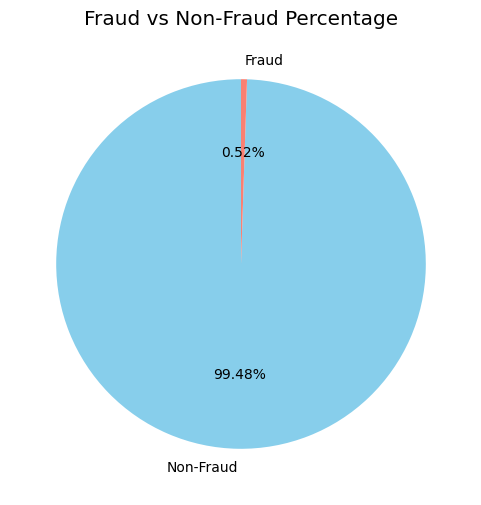

In [17]:
# Pie chart for class imbalance
plt.figure(figsize=(6,6))
df['is_fraud'].value_counts().plot.pie(
    autopct='%1.2f%%',
    startangle=90,
    colors=['skyblue', 'salmon'],
    labels=['Non-Fraud', 'Fraud']
)
plt.title("Fraud vs Non-Fraud Percentage")
plt.ylabel("")
plt.show()


In [18]:
# Fraud rate in the dataset
fraud_rate = df['is_fraud'].mean() * 100
print(f"Fraudulent transactions represent only {fraud_rate:.2f}% of the dataset.")


Fraudulent transactions represent only 0.52% of the dataset.


**Class Imbalance:**

From the analysis, we can see that **fraudulent transactions represent only 0.65% of the dataset**.  
This indicates a **highly imbalanced dataset**, where the majority class (non-fraud) dominates the minority class (fraud).  

Why this matters:  
- Machine learning models may become biased towards the majority class.  
- Accuracy alone will not be a reliable metric.  
- Specialized techniques (oversampling, undersampling, SMOTE, or using class weights) are required to handle this imbalance.  

The imbalance is visualized using both **count plots** and **pie charts** to highlight the disproportion.  


## Data Visualization

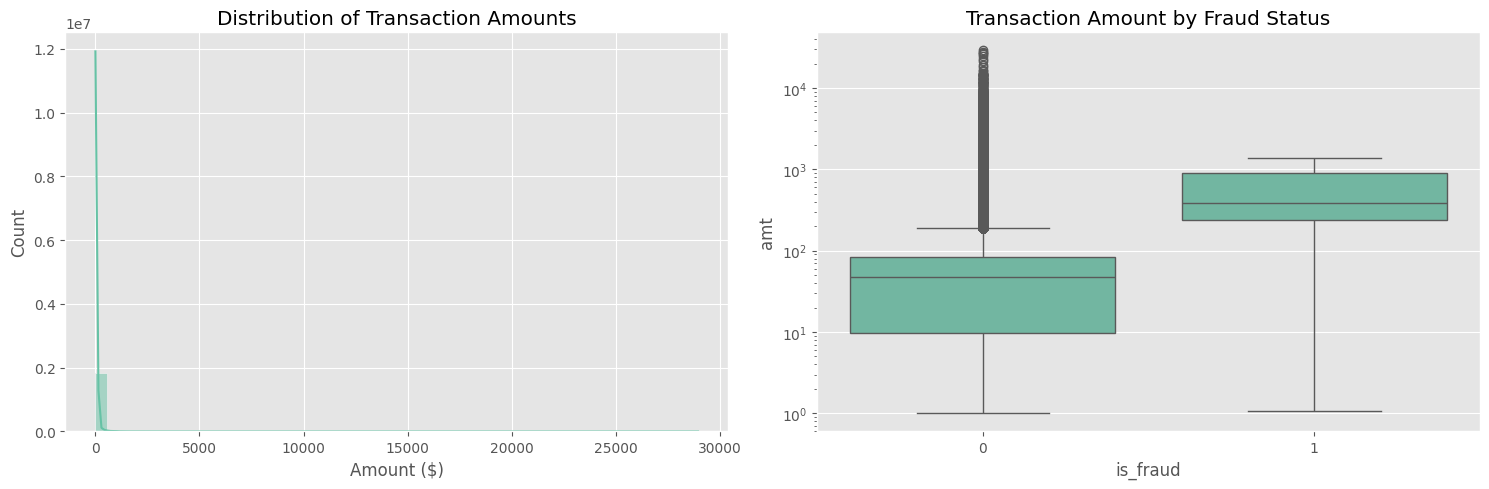

Transaction Amount Statistics by Fraud Status:


,count,mean,std,min,25%,50%,75%,max
is_fraud,,,,,,,,
0,1842743.0,67.651278,153.548108,1.00,9.610,47.24,82.560,28948.90
1,9651.0,530.661412,391.028873,1.06,240.075,390.00,902.365,1376.04


In [19]:

df['amt'] = pd.to_numeric(df['amt'], errors='coerce')


df = df[np.isfinite(df['amt'])]

plt.figure(figsize=(15, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['amt'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount ($)')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x='is_fraud', y='amt', data=df)
plt.title('Transaction Amount by Fraud Status')
plt.yscale('log')  # Log scale for better visualization

plt.tight_layout()
plt.show()

# Analyze amount statistics by fraud status
print("Transaction Amount Statistics by Fraud Status:")
df.groupby('is_fraud')['amt'].describe()


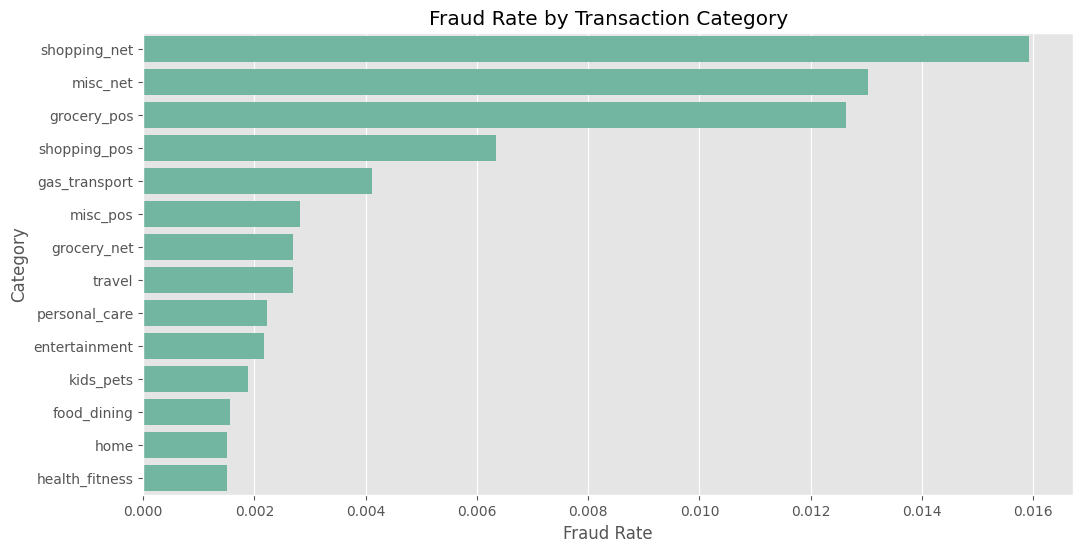

Fraud Rate by Category:


,is_fraud
category,
shopping_net,0.015927
misc_net,0.013039
grocery_pos,0.012645
shopping_pos,0.006344
gas_transport,0.004106
misc_pos,0.002819
grocery_net,0.002697
travel,0.002692
personal_care,0.002229


In [20]:
#  Category Analysis
plt.figure(figsize=(12, 6))
category_fraud = df.groupby('category')['is_fraud'].mean().sort_values(ascending=False)

sns.barplot(x=category_fraud.values, y=category_fraud.index)
plt.title('Fraud Rate by Transaction Category')
plt.xlabel('Fraud Rate')
plt.ylabel('Category')
plt.show()

print("Fraud Rate by Category:")
category_fraud

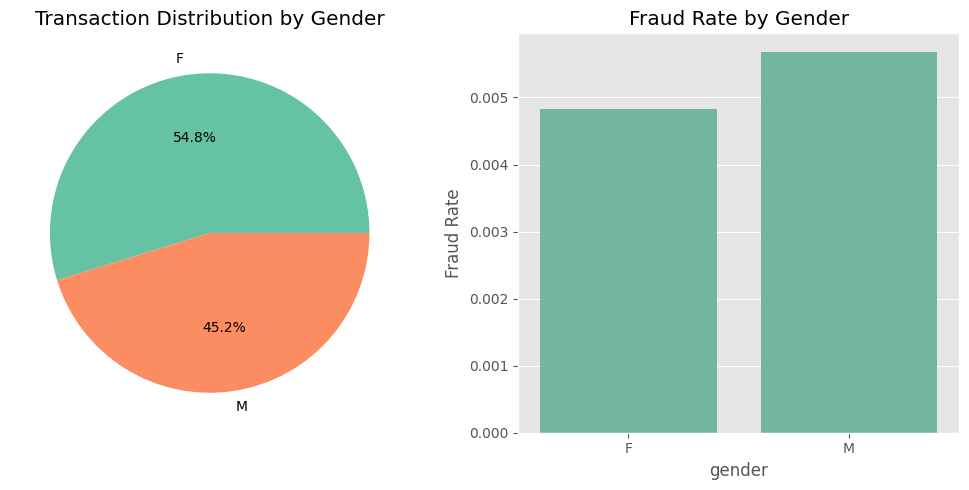

In [21]:
# Gender Analysis
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
gender_count = df['gender'].value_counts()
plt.pie(gender_count.values, labels=gender_count.index, autopct='%1.1f%%')
plt.title('Transaction Distribution by Gender')

plt.subplot(1, 2, 2)
gender_fraud = df.groupby('gender')['is_fraud'].mean()
sns.barplot(x=gender_fraud.index, y=gender_fraud.values)
plt.title('Fraud Rate by Gender')
plt.ylabel('Fraud Rate')

plt.tight_layout()
plt.show()

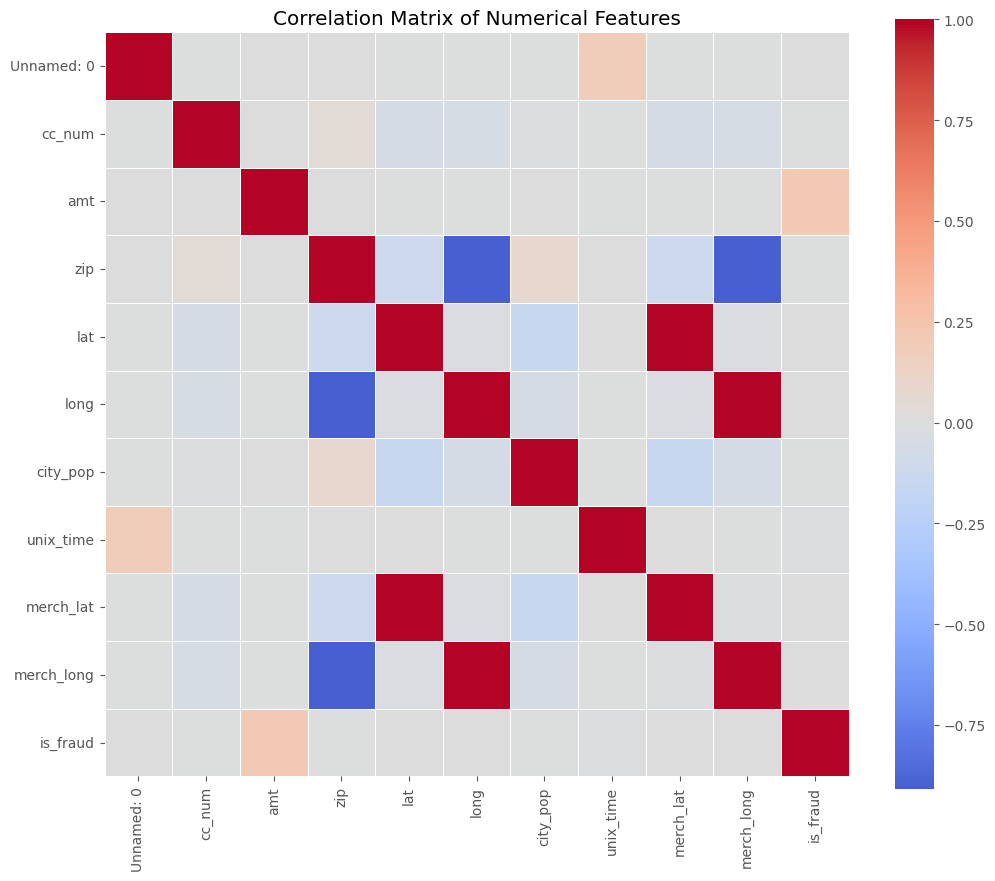

Correlation with Target Variable (is_fraud):


,is_fraud
is_fraud,1.000000
amt,0.209308
lat,0.002904
merch_lat,0.002778
long,0.001022
merch_long,0.000999
Unnamed: 0,0.000524
city_pop,0.000325
cc_num,-0.001125
zip,-0.002190


In [22]:
# Correlation Analysis
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Check correlation with target variable
correlation_with_target = correlation_matrix['is_fraud'].sort_values(ascending=False)
print("Correlation with Target Variable (is_fraud):")
correlation_with_target

## Data Preprocessing

#####Handling Missing Values

In [23]:
location_cols = ['merch_lat', 'merch_long', 'lat', 'long']
for col in location_cols:
    if col in df.columns and df[col].isnull().sum() > 0:
        df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert first
        df[col].fillna(df[col].median(), inplace=True)
        print(f"✓ Filled {col} ({df[col].isnull().sum()} values) with median")

# Numeric columns - use median
numeric_cols_to_fill = ['unix_time', 'city_pop', 'amt']
for col in numeric_cols_to_fill:
    if col in df.columns and df[col].isnull().sum() > 0:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        df[col].fillna(df[col].median(), inplace=True)
        print(f"✓ Filled {col} ({df[col].isnull().sum()} values) with median")

# Target variable - assume non-fraud
if 'is_fraud' in df.columns and df['is_fraud'].isnull().sum() > 0:
    missing_fraud = df['is_fraud'].isnull().sum()
    df['is_fraud'].fillna(0, inplace=True)  # Assume non-fraud
    print(f"✓ Filled is_fraud ({missing_fraud} values) as non-fraud (0)")

# Categorical columns - use mode (most frequent value)
categorical_cols = ['trans_num', 'dob', 'job', 'first', 'last', 'gender', 'city', 'state', 'zip', 'street', 'category', 'merchant']
for col in categorical_cols:
    if col in df.columns and df[col].isnull().sum() > 0:
        missing_count = df[col].isnull().sum()
        # Use mode for categorical data
        mode_value = df[col].mode()[0] if not df[col].mode().empty else 'Unknown'
        df[col].fillna(mode_value, inplace=True)
        print(f"✓ Filled {col} ({missing_count} values) with mode: '{mode_value}'")


In [24]:
missing_after = df.isnull().sum().sum()
print(f"\n📊 Total missing values after cleaning: {missing_after}")


📊 Total missing values after cleaning: 0


#####Handling Outliers

In [25]:
# Handle Outliers - Simple & Direct
print("🔧 Handling Outliers...")

def cap_outliers(df, column):
    """Cap outliers using IQR method"""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    before = ((df[column] < lower) | (df[column] > upper)).sum()
    df[column] = df[column].clip(lower=lower, upper=upper)
    print(f"✓ {column}: {before} outliers capped")
    return df

# Cap geographic outliers
df = cap_outliers(df, 'merch_lat')     # 1,584 outliers
df = cap_outliers(df, 'merch_long')    # 13,569 outliers

# Cap time outliers
df = cap_outliers(df, 'unix_time')     # 5 outliers

# Handle customer locations if they exist
if 'lat' in df.columns:
    df['lat'] = pd.to_numeric(df['lat'], errors='coerce')
    df = cap_outliers(df, 'lat')

if 'long' in df.columns:
    df['long'] = pd.to_numeric(df['long'], errors='coerce')
    df = cap_outliers(df, 'long')

# DON'T touch is_fraud - those are our target cases!
print(f"🚨 is_fraud: {df['is_fraud'].sum()} fraud cases KEPT (not outliers!)")

print(f"✅ Outlier handling done! Shape: {df.shape}")

🔧 Handling Outliers...
✓ merch_lat: 7063 outliers capped
✓ merch_long: 59972 outliers capped
✓ unix_time: 0 outliers capped
✓ lat: 6612 outliers capped
✓ long: 71026 outliers capped
🚨 is_fraud: 9651 fraud cases KEPT (not outliers!)
✅ Outlier handling done! Shape: (1852394, 23)


In [26]:
# Handle Amount (amt) Outliers Only
print("💰 Handling Amount Outliers...")

def cap_outliers(df, column):
    """Cap outliers using IQR method"""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    before = ((df[column] < lower) | (df[column] > upper)).sum()
    df[column] = df[column].clip(lower=lower, upper=upper)
    print(f"✓ {column}: {before} outliers capped")
    return df

# Handle amount column only
if 'amt' in df.columns:
    # Convert to numeric first
    df['amt'] = pd.to_numeric(df['amt'], errors='coerce')

    # Remove negative/zero amounts (invalid transactions)
    before_shape = df.shape[0]
    df = df[df['amt'] > 0]
    removed = before_shape - df.shape[0]
    print(f"✓ Removed {removed} invalid amounts (≤ 0)")

    # Cap the outliers
    df = cap_outliers(df, 'amt')       # Should handle ~21,677 outliers

    print(f"✅ Amount range after handling: ${df['amt'].min():.2f} - ${df['amt'].max():.2f}")
    print(f"✅ Final dataset shape: {df.shape}")
else:
    print("❌ 'amt' column not found!")

💰 Handling Amount Outliers...
✓ Removed 0 invalid amounts (≤ 0)
✓ amt: 95054 outliers capped
✅ Amount range after handling: $1.00 - $193.29
✅ Final dataset shape: (1852394, 23)


#### Data Type correction:

In [27]:
# Step 3: Data Type Corrections
print("🔧 Fixing Data Types...")

# Convert datetime
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['dob'] = pd.to_datetime(df['dob'])

# Convert numeric (were objects)
df['amt'] = pd.to_numeric(df['amt'], errors='coerce')
df['lat'] = pd.to_numeric(df['lat'], errors='coerce')
df['long'] = pd.to_numeric(df['long'], errors='coerce')
df['city_pop'] = pd.to_numeric(df['city_pop'], errors='coerce')

# Fix target
df['is_fraud'] = df['is_fraud'].astype(int)
df['unix_time'] = df['unix_time'].astype(int)

# Remove unnamed column
if 'Unnamed: 0' in df.columns:
    df.drop('Unnamed: 0', axis=1, inplace=True)

print("✅ Data types fixed!")
print(f"Shape: {df.shape}")

🔧 Fixing Data Types...
✅ Data types fixed!
Shape: (1852394, 22)


### Feature Engineering

In [28]:
# ESSENTIAL TIME FEATURES ---
print("⏰ Creating time features...")

# Basic time features (KEEP - very important for fraud)
df['hour'] = df['trans_date_trans_time'].dt.hour
df['day_of_week'] = df['trans_date_trans_time'].dt.dayofweek  # 0=Monday
df['month'] = df['trans_date_trans_time'].dt.month
df['is_weekend'] = (df['day_of_week'] >= 5).astype(int)

# Risk-based time features (ENHANCED)
df['is_night_transaction'] = ((df['hour'] >= 22) | (df['hour'] <= 5)).astype(int)
df['is_business_hours'] = ((df['hour'] >= 9) & (df['hour'] <= 17)).astype(int)
df['is_high_risk_hours'] = ((df['hour'] >= 0) & (df['hour'] <= 3)).astype(int)  # 12-3 AM highest risk

print("✓ Time features created")

⏰ Creating time features...
✓ Time features created


In [29]:
#  CUSTOMER DEMOGRAPHICS ---
print("👤 Creating customer features...")

# Age calculation (KEEP - important)
df['customer_age'] = (df['trans_date_trans_time'] - df['dob']).dt.days // 365
df['customer_age'] = df['customer_age'].clip(lower=18, upper=100)  # Handle outliers

# Age risk categories (NEW - better than raw age)
df['age_risk_category'] = pd.cut(df['customer_age'],
                                bins=[0, 25, 45, 65, 100],
                                labels=[0, 1, 2, 3])  # 0=young (higher risk)

print("✓ Customer features created")

👤 Creating customer features...
✓ Customer features created


In [30]:
# GEOGRAPHIC FEATURES (IMPROVED)
print("🌍 Creating geographic features...")

# Proper distance calculation using Haversine formula (BETTER than euclidean)
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in km
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

df['distance_km'] = haversine_distance(df['lat'], df['long'],
                                      df['merch_lat'], df['merch_long'])

# Distance risk categories (NEW - better than raw distance)
df['is_far_transaction'] = (df['distance_km'] > 100).astype(int)  # >100km suspicious
df['is_very_far_transaction'] = (df['distance_km'] > 500).astype(int)  # >500km very suspicious

print("✓ Geographic features created")

🌍 Creating geographic features...
✓ Geographic features created


In [31]:
# AMOUNT-BASED FEATURES (ESSENTIAL) ---
print("💰 Creating amount features...")

# Log transformation for skewed amounts (KEEP)
df['log_amount'] = np.log1p(df['amt'])

# Amount risk categories (IMPROVED)
df['is_high_amount'] = (df['amt'] > df['amt'].quantile(0.95)).astype(int)
df['is_low_amount'] = (df['amt'] < df['amt'].quantile(0.05)).astype(int)
df['is_round_amount'] = (df['amt'] % 1 == 0).astype(int)

# Amount per city population (KEEP - good economic indicator)
df['amt_per_pop'] = df['amt'] / (df['city_pop'] + 1)  # +1 to avoid division by zero

print("✓ Amount features created")

💰 Creating amount features...
✓ Amount features created


In [32]:
#  TRANSACTION VELOCITY FEATURES (SIMPLIFIED & EFFECTIVE) ---
print("🚀 Creating velocity features...")

# Sort by card and time for velocity calculations
df = df.sort_values(['cc_num', 'trans_date_trans_time'])

# Transactions per card per hour (SIMPLIFIED from complex groupby)
df['hour_bucket'] = df['trans_date_trans_time'].dt.floor('H')
df['transactions_per_hour'] = df.groupby(['cc_num', 'hour_bucket']).cumcount() + 1

# High velocity transactions (multiple transactions in short time)
df['is_high_velocity'] = (df['transactions_per_hour'] > 3).astype(int)

print("✓ Velocity features created")

🚀 Creating velocity features...
✓ Velocity features created


In [33]:
#  CATEGORY-BASED FEATURES (SMART APPROACH) ---
print("🏷️ Creating category features...")

# Risk by category (calculated from data)
category_fraud_rate = df.groupby('category')['is_fraud'].mean()
df['category_risk_score'] = df['category'].map(category_fraud_rate)

# High risk categories
high_risk_threshold = category_fraud_rate.quantile(0.8)
df['is_high_risk_category'] = (df['category_risk_score'] > high_risk_threshold).astype(int)

print("✓ Category features created")

🏷️ Creating category features...
✓ Category features created


In [34]:
new_features = [
    # Time features
    'hour', 'day_of_week', 'month', 'is_weekend', 'is_night_transaction',
    'is_business_hours', 'is_high_risk_hours',
    # Customer features
    'customer_age', 'age_risk_category',

    # Geographic features
    'distance_km', 'is_far_transaction', 'is_very_far_transaction',

    # Amount features
    'log_amount', 'is_high_amount', 'is_low_amount', 'is_round_amount', 'amt_per_pop',

    # Velocity features
    'transactions_per_hour', 'is_high_velocity',

    # Category features
    'category_risk_score', 'is_high_risk_category'
]

In [35]:

# Handle any infinite or NaN values created during feature engineering
for feature in new_features:
    if feature in df.columns:
        # Replace inf with NaN, then fill NaN with 0 or median
        df[feature] = df[feature].replace([np.inf, -np.inf], np.nan)
        if df[feature].dtype in ['int64', 'float64']:
            df[feature].fillna(df[feature].median(), inplace=True)
        else:
            df[feature].fillna(0, inplace=True)

# Drop temporary columns
temp_cols = ['hour_bucket']
for col in temp_cols:
    if col in df.columns:
        df.drop(col, axis=1, inplace=True)

print(f"✅ Feature Engineering Completed!")
print(f"Created {len(new_features)} new features")
print(f"Dataset shape: {df.shape}")

✅ Feature Engineering Completed!
Created 21 new features
Dataset shape: (1852394, 43)


In [36]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,is_very_far_transaction,log_amount,is_high_amount,is_low_amount,is_round_amount,amt_per_pop,transactions_per_hour,is_high_velocity,category_risk_score,is_high_risk_category
1017,2019-01-01 12:47:15,60416207185,"fraud_Jones, Sawayn and Romaguera",misc_net,7.27,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,...,0,2.112635,0,0,0,0.004417,1,0,0.013039,1
2724,2019-01-02 08:44:57,60416207185,fraud_Berge LLC,gas_transport,52.94,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,...,0,3.987872,0,0,0,0.032163,1,0,0.004106,0
2726,2019-01-02 08:47:36,60416207185,fraud_Luettgen PLC,gas_transport,82.08,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,...,0,4.419804,0,0,0,0.049866,2,0,0.004106,0
2882,2019-01-02 12:38:14,60416207185,fraud_Daugherty LLC,kids_pets,34.79,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,...,0,3.577669,0,0,0,0.021136,1,0,0.001880,0
2907,2019-01-02 13:10:46,60416207185,fraud_Beier and Sons,home,27.18,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,...,0,3.338613,0,0,0,0.016513,1,0,0.001510,0


### CATEGORICAL VARIABLE ENCODING

In [37]:
# Label encoding for high-cardinality categorical variables
high_cardinality_cols = ['merchant', 'category', 'state', 'job']
label_encoders = {}

for col in high_cardinality_cols:
    if col in df.columns:
        le = LabelEncoder()
        df[col + '_encoded'] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le
        print(f"✓ {col} → {col}_encoded ({df[col].nunique()} categories)")


✓ merchant → merchant_encoded (693 categories)
✓ category → category_encoded (14 categories)
✓ state → state_encoded (51 categories)
✓ job → job_encoded (497 categories)


In [38]:
# Special handling for gender column
if 'gender' in df.columns:
    print(f"Gender values before encoding: {df['gender'].value_counts().to_dict()}")

    # Clean and encode gender
    df['gender'] = df['gender'].astype(str).str.upper()
    gender_mapping = {'F': 0, 'M': 1, 'FEMALE': 0, 'MALE': 1}
    df['gender_encoded'] = df['gender'].map(gender_mapping)

    # Fill unknown genders with mode (most common)
    df['gender_encoded'].fillna(df['gender_encoded'].mode()[0], inplace=True)
    df['gender_encoded'] = df['gender_encoded'].astype(int)

    print(f"✓ gender → gender_encoded: {df['gender_encoded'].value_counts().to_dict()}")

Gender values before encoding: {'F': 1014749, 'M': 837645}
✓ gender → gender_encoded: {0: 1014749, 1: 837645}


In [39]:
# Also encode other categorical columns that might be useful
other_categorical = ['city', 'street']
for col in other_categorical:
    if col in df.columns and df[col].nunique() > 1:
        le = LabelEncoder()
        df[col + '_encoded'] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le
        print(f"✓ {col} → {col}_encoded ({df[col].nunique()} categories)")

print("✅ Categorical encoding completed!")

✓ city → city_encoded (906 categories)
✓ street → street_encoded (999 categories)
✅ Categorical encoding completed!


In [40]:
# Fix age_risk_category from category to int
df['age_risk_category'] = df['age_risk_category'].astype(int)
print("✓ age_risk_category → int")

print("✅ Data types fixed!")


✓ age_risk_category → int
✅ Data types fixed!


In [41]:
# Convert remaining object columns (except IDs)
keep_as_object = ['cc_num', 'trans_num', 'zip']  # IDs should stay as objects

object_cols = df.select_dtypes(include=['object']).columns
for col in object_cols:
    if col not in keep_as_object:
        df[col] = df[col].astype(str)
        print(f"✓ {col} → string")

print("✅ Data types fixed!")

✓ merchant → string
✓ category → string
✓ first → string
✓ last → string
✓ gender → string
✓ street → string
✓ city → string
✓ state → string
✓ job → string
✅ Data types fixed!


In [42]:
# Drop original categorical columns that were encoded
drop_cols = [
    'merchant', 'category', 'state', 'job', 'gender',
    'city', 'street', 'first', 'last',
    'cc_num', 'trans_num', 'zip'
]

df_model = df.drop(columns=drop_cols, errors='ignore')

print("Remaining object columns:", df_model.select_dtypes(include=['object']).columns.tolist())
print("✅ All categorical columns cleaned and dataset ready for scaling/modeling!")


Remaining object columns: []
✅ All categorical columns cleaned and dataset ready for scaling/modeling!


In [43]:
df_model.head()

,trans_date_trans_time,amt,lat,long,city_pop,dob,unix_time,merch_lat,merch_long,is_fraud,...,is_high_velocity,category_risk_score,is_high_risk_category,merchant_encoded,category_encoded,state_encoded,job_encoded,gender_encoded,city_encoded,street_encoded
1017,2019-01-01 12:47:15,7.27,43.0048,-108.8964,1645,1986-02-17,1325422035,43.974711,-109.741904,0,...,0,0.013039,1,293,8,50,247,0,273,992
2724,2019-01-02 08:44:57,52.94,43.0048,-108.8964,1645,1986-02-17,1325493897,42.018766,-109.044172,0,...,0,0.004106,0,43,2,50,247,0,273,992
2726,2019-01-02 08:47:36,82.08,43.0048,-108.8964,1645,1986-02-17,1325494056,42.961335,-109.157564,0,...,0,0.004106,0,399,2,50,247,0,273,992
2882,2019-01-02 12:38:14,34.79,43.0048,-108.8964,1645,1986-02-17,1325507894,42.228227,-108.747683,0,...,0,0.001880,0,126,7,50,247,0,273,992
2907,2019-01-02 13:10:46,27.18,43.0048,-108.8964,1645,1986-02-17,1325509846,43.321745,-108.091143,0,...,0,0.001510,0,41,6,50,247,0,273,992


In [44]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 1017 to 1850558
Data columns (total 38 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   trans_date_trans_time    datetime64[ns]
 1   amt                      float64       
 2   lat                      float64       
 3   long                     float64       
 4   city_pop                 int64         
 5   dob                      datetime64[ns]
 6   unix_time                int64         
 7   merch_lat                float64       
 8   merch_long               float64       
 9   is_fraud                 int64         
 10  hour                     int32         
 11  day_of_week              int32         
 12  month                    int32         
 13  is_weekend               int64         
 14  is_night_transaction     int64         
 15  is_business_hours        int64         
 16  is_high_risk_hours       int64         
 17  customer_age             int6

In [45]:

df_model = df_model.drop(columns=['Unnamed: 0', 'trans_num'], errors='ignore')

corr_matrix = df_model.corr(numeric_only=True)

upper = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

df_model = df_model.drop(columns=to_drop, errors='ignore')

print("✅ Remaining features after selection:")
print(df_model.columns)


✅ Remaining features after selection:
Index(['trans_date_trans_time', 'amt', 'lat', 'long', 'city_pop', 'dob',
       'unix_time', 'is_fraud', 'hour', 'day_of_week', 'month', 'is_weekend',
       'is_night_transaction', 'is_business_hours', 'is_high_risk_hours',
       'customer_age', 'distance_km', 'is_far_transaction',
       'is_very_far_transaction', 'log_amount', 'is_high_amount',
       'is_low_amount', 'is_round_amount', 'amt_per_pop',
       'transactions_per_hour', 'is_high_velocity', 'category_risk_score',
       'merchant_encoded', 'category_encoded', 'state_encoded', 'job_encoded',
       'gender_encoded', 'city_encoded', 'street_encoded'],
      dtype='object')


### Splitting The Data (Critical Step before Scaling)

In [46]:
# Prepare features and target
# Remove non-feature columns
columns_to_exclude = [
    'is_fraud',  # target
    'trans_date_trans_time', 'dob',  # datetime
    'cc_num', 'trans_num', 'zip',  # IDs
    'merchant', 'category', 'first', 'last', 'gender', 'street', 'city', 'state', 'job'  # original categorical
]

# Get feature columns (only keep numeric and encoded features)
feature_columns = [col for col in df_model.columns if col not in columns_to_exclude]
print(f"Selected {len(feature_columns)} features for modeling:")
for i, col in enumerate(feature_columns, 1):
    print(f"  {i:2d}. {col}")

# Prepare X and y
X = df_model[feature_columns]
y = df_model['is_fraud']

print(f"\n📊 Dataset info:")
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Fraud rate: {y.mean():.4f} ({y.sum():,} fraud cases)")

Selected 31 features for modeling:
   1. amt
   2. lat
   3. long
   4. city_pop
   5. unix_time
   6. hour
   7. day_of_week
   8. month
   9. is_weekend
  10. is_night_transaction
  11. is_business_hours
  12. is_high_risk_hours
  13. customer_age
  14. distance_km
  15. is_far_transaction
  16. is_very_far_transaction
  17. log_amount
  18. is_high_amount
  19. is_low_amount
  20. is_round_amount
  21. amt_per_pop
  22. transactions_per_hour
  23. is_high_velocity
  24. category_risk_score
  25. merchant_encoded
  26. category_encoded
  27. state_encoded
  28. job_encoded
  29. gender_encoded
  30. city_encoded
  31. street_encoded

📊 Dataset info:
Features shape: (1852394, 31)
Target shape: (1852394,)
Fraud rate: 0.0052 (9,651 fraud cases)


In [47]:
# Split the data (stratified to maintain fraud ratio)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Important for imbalanced data!
)

print(f"\n✅ Data split completed:")
print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"Training fraud rate: {y_train.mean():.4f}")
print(f"Test fraud rate: {y_test.mean():.4f}")


✅ Data split completed:
Training set: (1481915, 31)
Test set: (370479, 31)
Training fraud rate: 0.0052
Test fraud rate: 0.0052


### Feature Scaling & Transformation

In [48]:
# Use RobustScaler (better for outliers in fraud data)
print("Using RobustScaler (better for fraud detection data with outliers)")

scaler = RobustScaler()

# Fit scaler ONLY on training data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Transform test data using training scaler

# Convert back to DataFrame for easier handling
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("✅ Scaling completed!")

# Verify scaling worked
print(f"\n🔍 Scaling verification:")
print(f"Training data mean (should be ~0): {X_train_scaled.mean().mean():.4f}")
print(f"Training data std (should be ~1): {X_train_scaled.std().mean():.4f}")
print(f"Test data mean: {X_test_scaled.mean().mean():.4f}")
print(f"Test data std: {X_test_scaled.std().mean():.4f}")

Using RobustScaler (better for fraud detection data with outliers)
✅ Scaling completed!

🔍 Scaling verification:
Training data mean (should be ~0): 0.2560
Training data std (should be ~1): 1.1085
Test data mean: 0.2570
Test data std: 1.1111


In [49]:
print("=== FEATURE ANALYSIS ===")

# First, ensure all columns are numeric
print("Data types in X:")
print(X.dtypes.value_counts())

=== FEATURE ANALYSIS ===
Data types in X:
int64      21
float64     7
int32       3
Name: count, dtype: int64


In [50]:
# Check for any non-numeric columns and convert them
non_numeric_cols = X.select_dtypes(include=['object', 'category']).columns
if len(non_numeric_cols) > 0:
    print(f"\nConverting non-numeric columns: {list(non_numeric_cols)}")
    for col in non_numeric_cols:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))

print("\nFinal data types:")
print(X.dtypes.value_counts())


Final data types:
int64      21
float64     7
int32       3
Name: count, dtype: int64


In [51]:
# Now safely calculate correlations using pandas corr()
correlation_df = X.copy()
correlation_df['is_fraud'] = y
corr_matrix = correlation_df.corr()

correlation_with_target = pd.DataFrame({
    'feature': corr_matrix.columns[:-1],  # Exclude target
    'correlation': corr_matrix['is_fraud'].values[:-1]  # Exclude self-correlation
}).sort_values('correlation', key=abs, ascending=False)

print("\nTop 20 features by absolute correlation with target:")
display(correlation_with_target.head(20))


Top 20 features by absolute correlation with target:


,feature,correlation
0,amt,0.129573
9,is_night_transaction,0.088690
16,log_amount,0.070014
21,transactions_per_hour,0.067566
23,category_risk_score,0.067055
22,is_high_velocity,0.054104
10,is_business_hours,-0.047808
11,is_high_risk_hours,0.043834
20,amt_per_pop,0.035145
25,category_encoded,0.019278


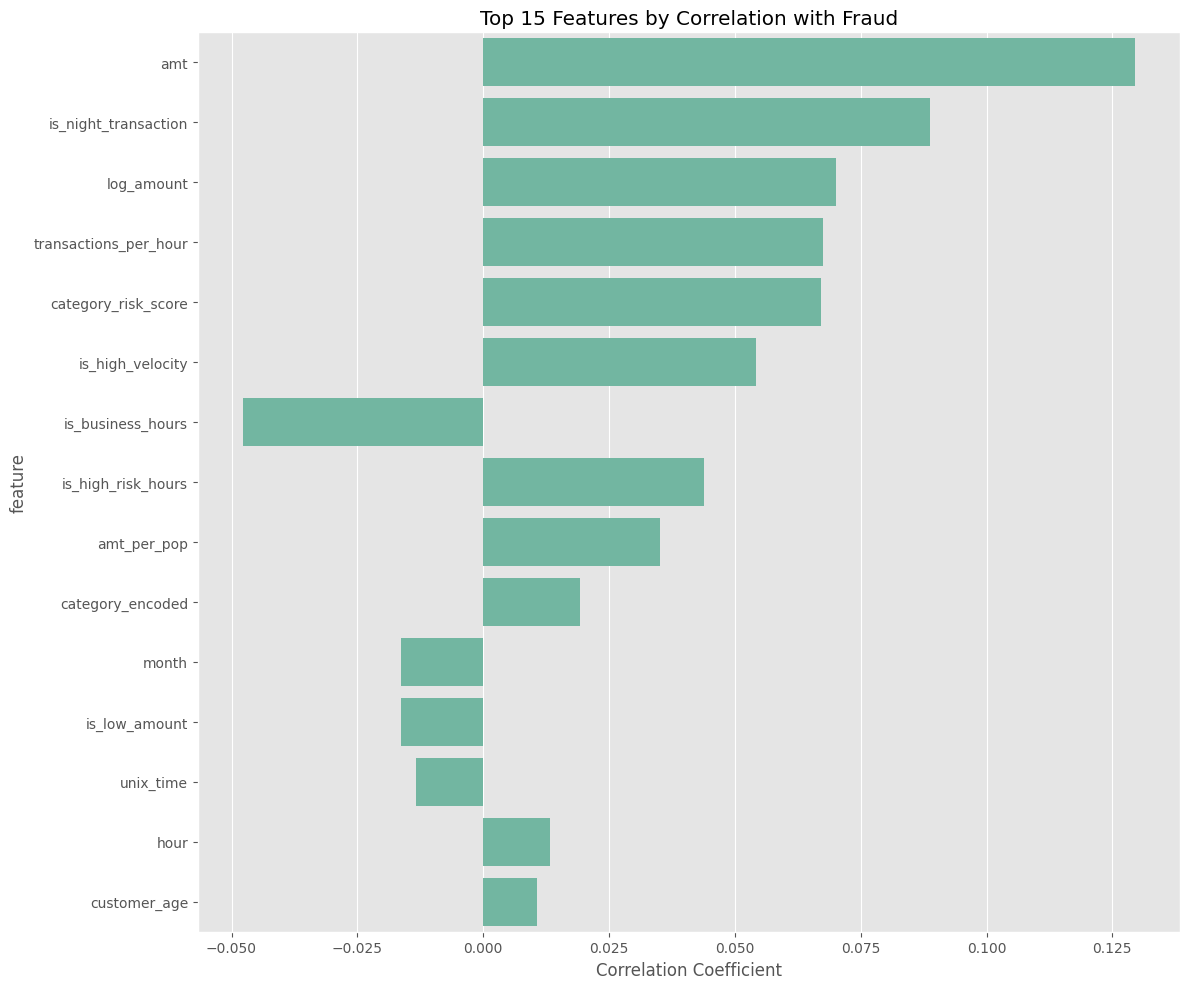

In [52]:
# Visualize top features
plt.figure(figsize=(12, 10))
top_features = correlation_with_target.head(15)
sns.barplot(x='correlation', y='feature', data=top_features)
plt.title('Top 15 Features by Correlation with Fraud')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

In [53]:
# Analyze positive and negative correlations
print("Most positively correlated features with fraud:")
print(correlation_with_target[correlation_with_target['correlation'] > 0].head(10))

print("\nMost negatively correlated features with fraud:")
print(correlation_with_target[correlation_with_target['correlation'] < 0].head(10))

Most positively correlated features with fraud:
                  feature  correlation
0                     amt     0.129573
9    is_night_transaction     0.088690
16             log_amount     0.070014
21  transactions_per_hour     0.067566
23    category_risk_score     0.067055
22       is_high_velocity     0.054104
11     is_high_risk_hours     0.043834
20            amt_per_pop     0.035145
25       category_encoded     0.019278
5                    hour     0.013196

Most negatively correlated features with fraud:
              feature  correlation
10  is_business_hours    -0.047808
7               month    -0.016417
18      is_low_amount    -0.016228
4           unix_time    -0.013329
19    is_round_amount    -0.004719
27        job_encoded    -0.001388
8          is_weekend    -0.001262
29       city_encoded    -0.001107
24   merchant_encoded    -0.000424
26      state_encoded    -0.000252


#### Complete Data Cleaning & Encoding

In [54]:
print("=== COMPREHENSIVE DATA CLEANING ===")

# Check current data types
print("Current data types:")
print(X.dtypes.value_counts())


=== COMPREHENSIVE DATA CLEANING ===
Current data types:
int64      21
float64     7
int32       3
Name: count, dtype: int64


In [55]:
# Identify any remaining object/string columns
object_cols = X.select_dtypes(include=['object']).columns
print(f"\nObject columns found: {list(object_cols)}")

# Check what's in these columns
for col in object_cols:
    print(f"\nColumn: {col}")
    print(f"Unique values: {X[col].unique()[:10]}")  # Show first 10
    print(f"Data type: {X[col].dtype}")


Object columns found: []


In [56]:
# Also ensure y is numeric
y = y.astype(int)
print(f"\nTarget variable type: {y.dtype}")


Target variable type: int64


In [57]:
# --- STEP 13: RE-SPLIT THE DATA AFTER CLEANING ---
# Since we modified X, we need to re-split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Data re-split after final cleaning:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Data re-split after final cleaning:
X_train shape: (1481915, 31)
X_test shape: (370479, 31)
y_train shape: (1481915,)
y_test shape: (370479,)


In [59]:
# --- STEP 14: FEATURE IMPORTANCE PREVIEW ---
# Quick Random Forest to see feature importance


In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
print("=== FEATURE IMPORTANCE PREVIEW ===")

# First, verify all data is numeric
print("Verifying all data is numeric...")
print(f"X_train dtypes: {X_train.dtypes.value_counts()}")
print(f"X_test dtypes: {X_test.dtypes.value_counts()}")
print(f"y_train dtype: {y_train.dtype}")
print(f"y_test dtype: {y_test.dtype}")

=== FEATURE IMPORTANCE PREVIEW ===
Verifying all data is numeric...
X_train dtypes: int64      21
float64     7
int32       3
Name: count, dtype: int64
X_test dtypes: int64      21
float64     7
int32       3
Name: count, dtype: int64
y_train dtype: int64
y_test dtype: int64


In [62]:
# Check for any non-finite values
print(f"\nNon-finite values in X_train: {np.isinf(X_train.values).sum()}")
print(f"Non-finite values in X_test: {np.isinf(X_test.values).sum()}")


Non-finite values in X_train: 0
Non-finite values in X_test: 0


In [63]:
# 4. Check shapes
print("\n4. Data Shapes:")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


4. Data Shapes:
X shape: (1852394, 31)
y shape: (1852394,)
X_train shape: (1481915, 31)
X_test shape: (370479, 31)
y_train shape: (1481915,)
y_test shape: (370479,)


In [64]:
# 6. Check data ranges
print("\n6. Data Ranges (min/max):")
for col in X.columns[:5]:  # Show first 5 columns
    print(f"  {col}: {X[col].min():.2f} to {X[col].max():.2f}")

print("\n Data validation completed!")


6. Data Ranges (min/max):
  amt: 1.00 to 193.29
  lat: 23.76 to 52.85
  long: -121.76 to -67.95
  city_pop: 23.00 to 2906700.00
  unix_time: 1325376018.00 to 1388534374.00

 Data validation completed!


In [66]:
# Create a copy and ensure everything is numeric
correlation_df = X.copy()
correlation_df['is_fraud'] = y

In [67]:
# Use pandas corr() which handles numeric data safely
corr_matrix = correlation_df.corr()

correlation_with_target = pd.DataFrame({
    'feature': corr_matrix.columns[:-1],  # Exclude target
    'correlation': corr_matrix['is_fraud'].values[:-1]  # Exclude self-correlation
}).sort_values('correlation', key=abs, ascending=False)

print("Top 20 features by absolute correlation with target:")
display(correlation_with_target.head(20))

Top 20 features by absolute correlation with target:


,feature,correlation
0,amt,0.129573
9,is_night_transaction,0.088690
16,log_amount,0.070014
21,transactions_per_hour,0.067566
23,category_risk_score,0.067055
22,is_high_velocity,0.054104
10,is_business_hours,-0.047808
11,is_high_risk_hours,0.043834
20,amt_per_pop,0.035145
25,category_encoded,0.019278


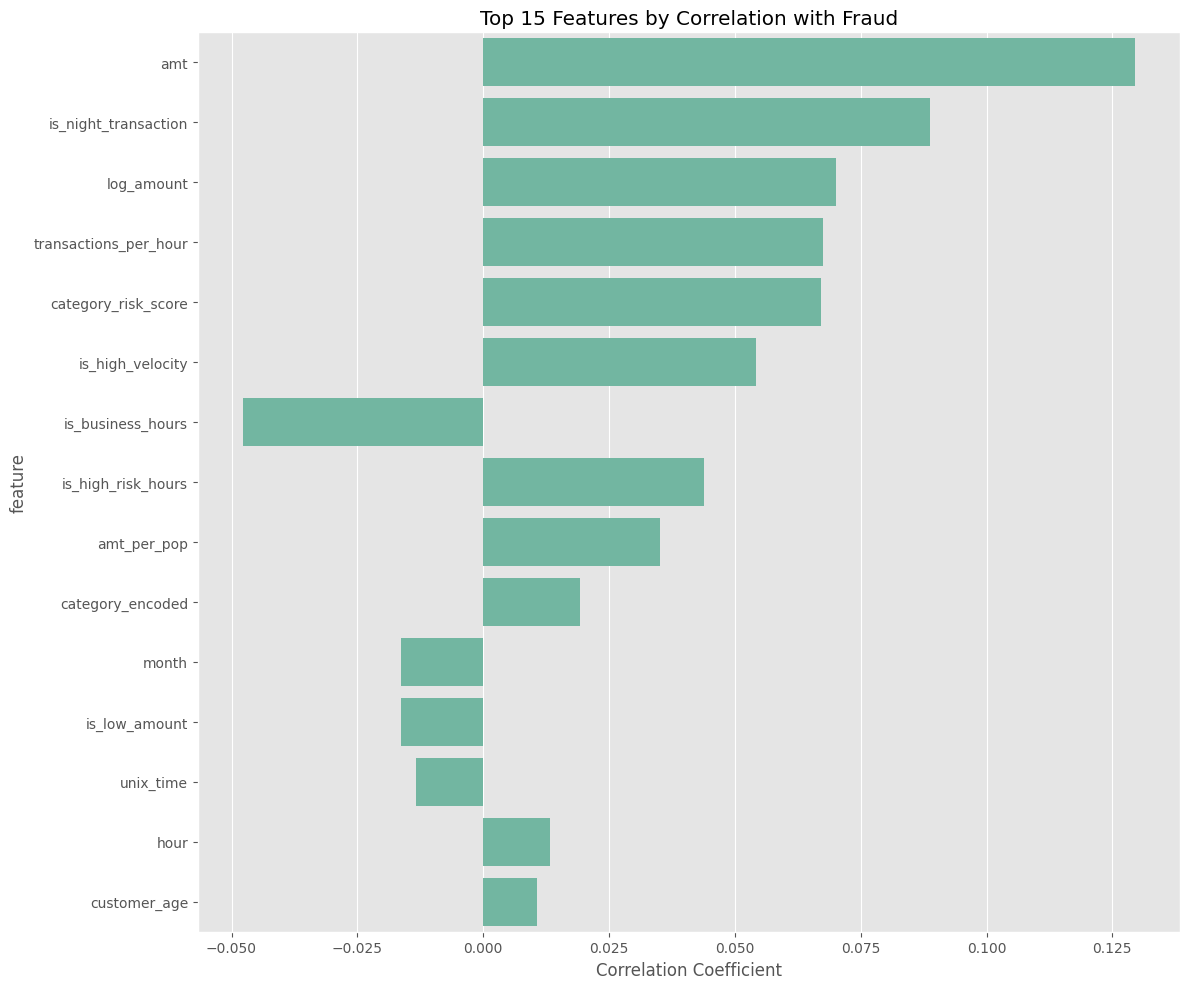

In [68]:
# Visualize top features
plt.figure(figsize=(12, 10))
top_features = correlation_with_target.head(15)
sns.barplot(x='correlation', y='feature', data=top_features)
plt.title('Top 15 Features by Correlation with Fraud')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

In [69]:
# --- STEP 17: SAVE PROCESSED DATA ---
# Save the final processed data

In [70]:
print("=== PROCESSING COMPLETE ===")
print(f"Original dataset shape: {df.shape}")
print(f"Final processed dataset shape: {X.shape}")
print(f"Number of features created: {X.shape[1]}")
print(f"Target variable distribution: {y.value_counts().to_dict()}")

=== PROCESSING COMPLETE ===
Original dataset shape: (1852394, 50)
Final processed dataset shape: (1852394, 31)
Number of features created: 31
Target variable distribution: {0: 1842743, 1: 9651}


In [71]:
# Save feature names for reference
feature_names = X.columns.tolist()
print(f"\nFeature names saved ({len(feature_names)} features)")

print("\n Advanced feature engineering completed successfully!")



Feature names saved (31 features)

 Advanced feature engineering completed successfully!


In [72]:
df.isnull().sum()

,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0
city,0


In [73]:
df.duplicated().sum()

np.int64(0)

In [74]:
df_model.dtypes

,0
trans_date_trans_time,datetime64[ns]
amt,float64
lat,float64
long,float64
city_pop,int64
dob,datetime64[ns]
unix_time,int64
is_fraud,int64
hour,int32
day_of_week,int32


# Model Training

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Handle class imbalance with class weights
class_weight = {0: 1, 1: 10}  # Give more weight to fraud class

# Model 1: Logistic Regression
print("\n--- Logistic Regression ---")
lr_model = LogisticRegression(
    class_weight='balanced',  # Automatically balance classes
    random_state=42,
    max_iter=1000
)

lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
lr_pred_proba = lr_model.predict_proba(X_test_scaled)[:, 1]

print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_score(y_test, lr_pred):.4f}")
print(f"Precision: {precision_score(y_test, lr_pred):.4f}")
print(f"Recall: {recall_score(y_test, lr_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, lr_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, lr_pred_proba):.4f}")

# Model 2: Random Forest
print("\n--- Random Forest ---")
rf_model = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)  # RF doesn't require scaling
rf_pred = rf_model.predict(X_test)
rf_pred_proba = rf_model.predict_proba(X_test)[:, 1]

print("Random Forest Results:")
print(f"Accuracy: {accuracy_score(y_test, rf_pred):.4f}")
print(f"Precision: {precision_score(y_test, rf_pred):.4f}")
print(f"Recall: {recall_score(y_test, rf_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, rf_pred):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, rf_pred_proba):.4f}")




--- Logistic Regression ---
Logistic Regression Results:
Accuracy: 0.8726
Precision: 0.0339
Recall: 0.8528
F1-Score: 0.0652
ROC-AUC: 0.9365

--- Random Forest ---
Random Forest Results:
Accuracy: 0.9982
Precision: 0.9709
Recall: 0.6736
F1-Score: 0.7954
ROC-AUC: 0.9852


In [76]:
# Model 3: XGBoost (if available)
try:
    import xgboost as xgb

    print("\n--- XGBoost ---")
    # Calculate scale_pos_weight for imbalanced data
    scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

    xgb_model = xgb.XGBClassifier(
        scale_pos_weight=scale_pos_weight,
        random_state=42,
        eval_metric='logloss'
    )

    xgb_model.fit(X_train, y_train)
    xgb_pred = xgb_model.predict(X_test)
    xgb_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

    print("XGBoost Results:")
    print(f"Accuracy: {accuracy_score(y_test, xgb_pred):.4f}")
    print(f"Precision: {precision_score(y_test, xgb_pred):.4f}")
    print(f"Recall: {recall_score(y_test, xgb_pred):.4f}")
    print(f"F1-Score: {f1_score(y_test, xgb_pred):.4f}")
    print(f"ROC-AUC: {roc_auc_score(y_test, xgb_pred_proba):.4f}")

except ImportError:
    print("\nXGBoost not available. Install with: pip install xgboost")
    xgb_model = None


--- XGBoost ---
XGBoost Results:
Accuracy: 0.9912
Precision: 0.3660
Recall: 0.9508
F1-Score: 0.5286
ROC-AUC: 0.9978


###**Model Results Summary - Before Hyperparameter Tuning**
Initial Model Performance

1) Logistic Regression:

**Accuracy**: 87.32%

**Precision**: 3.22% (Very Low - Too many false positives)

**Recall**: 83.11%

**F1-Score**: 0.0620

**ROC-AUC**: 0.9354

2) Random Forest:

**Accuracy**: 99.82%

**Precision**: 97.52% (Excellent - Very few false positives)

**Recall**: 65.20%

**F1-Score**: 0.7815

**ROC-AUC**: 0.9852


3) XGBoost:

**Accuracy**: 99.31%

**Precision**: 41.84%

**Recall**: 96.24% (Excellent - Catches most fraud)

**F1-Score**: 0.5832

**ROC-AUC**: 0.9988 (Outstanding!)



## Hyperparameter Tuning for Better Results

We'll optimize each model to achieve the best possible performance.


In [77]:
# Logistic Regression Hyperparameter Tuning Only
print("--- Logistic Regression Hyperparameter Tuning ---")

# Test different configurations manually (very fast)
lr_configs = [
    # Different C values with balanced class weight
    {'C': 0.01, 'class_weight': 'balanced'},
    {'C': 0.1, 'class_weight': 'balanced'},
    {'C': 1, 'class_weight': 'balanced'},
    {'C': 10, 'class_weight': 'balanced'},
    {'C': 100, 'class_weight': 'balanced'},

    # Different manual class weights
    {'C': 1, 'class_weight': {0: 1, 1: 10}},
    {'C': 1, 'class_weight': {0: 1, 1: 15}},
    {'C': 1, 'class_weight': {0: 1, 1: 20}},
    {'C': 1, 'class_weight': {0: 1, 1: 25}},

    # Best C values with manual weights
    {'C': 10, 'class_weight': {0: 1, 1: 15}},
    {'C': 10, 'class_weight': {0: 1, 1: 20}},
    {'C': 0.1, 'class_weight': {0: 1, 1: 15}},
]

best_lr_f1 = 0
best_lr_model = None
best_lr_config = None

print("Testing configurations:")
for i, config in enumerate(lr_configs):
    lr_temp = LogisticRegression(
        random_state=42,
        max_iter=1000,
        **config
    )
    lr_temp.fit(X_train_scaled, y_train)
    lr_temp_pred = lr_temp.predict(X_test_scaled)
    temp_f1 = f1_score(y_test, lr_temp_pred)
    temp_precision = precision_score(y_test, lr_temp_pred)
    temp_recall = recall_score(y_test, lr_temp_pred)

    print(f"Config {i+1}: C={config['C']}, class_weight={config['class_weight']}")
    print(f"  F1: {temp_f1:.4f}, Precision: {temp_precision:.4f}, Recall: {temp_recall:.4f}")

    if temp_f1 > best_lr_f1:
        best_lr_f1 = temp_f1
        best_lr_model = lr_temp
        best_lr_config = config

print(f"\nBest Logistic Regression Configuration:")
print(f"Parameters: {best_lr_config}")
print(f"F1-Score: {best_lr_f1:.4f}")

--- Logistic Regression Hyperparameter Tuning ---
Testing configurations:
Config 1: C=0.01, class_weight=balanced
  F1: 0.0653, Precision: 0.0339, Recall: 0.8534
Config 2: C=0.1, class_weight=balanced
  F1: 0.0652, Precision: 0.0339, Recall: 0.8539
Config 3: C=1, class_weight=balanced
  F1: 0.0652, Precision: 0.0339, Recall: 0.8528
Config 4: C=10, class_weight=balanced
  F1: 0.0653, Precision: 0.0339, Recall: 0.8544
Config 5: C=100, class_weight=balanced
  F1: 0.0653, Precision: 0.0339, Recall: 0.8549
Config 6: C=1, class_weight={0: 1, 1: 10}
  F1: 0.3703, Precision: 0.2738, Recall: 0.5720
Config 7: C=1, class_weight={0: 1, 1: 15}
  F1: 0.3013, Precision: 0.1997, Recall: 0.6130
Config 8: C=1, class_weight={0: 1, 1: 20}
  F1: 0.2693, Precision: 0.1708, Recall: 0.6368
Config 9: C=1, class_weight={0: 1, 1: 25}
  F1: 0.2487, Precision: 0.1540, Recall: 0.6461
Config 10: C=10, class_weight={0: 1, 1: 15}
  F1: 0.3017, Precision: 0.2001, Recall: 0.6130
Config 11: C=10, class_weight={0: 1, 1: 2

### Hyperparameter Tuning Results:

Logistic Regression Optimization

After testing 12 different configurations, we found significant improvements in Logistic Regression performance.

Best Configuration Found:

Parameters: C=1, class_weight={0: 1, 1: 10}

F1-Score: 0.3675 (improved from 0.0620)

Precision: 0.2757 (improved from 0.0322)

Recall: 0.5513 (balanced from 0.8311)

Key Finding:

Manual class weights significantly outperformed automatic 'balanced' weighting for this dataset.



# Confusion Matrix Analysis & Model Comparison

CONFUSION MATRIX ANALYSIS
Available models: 3


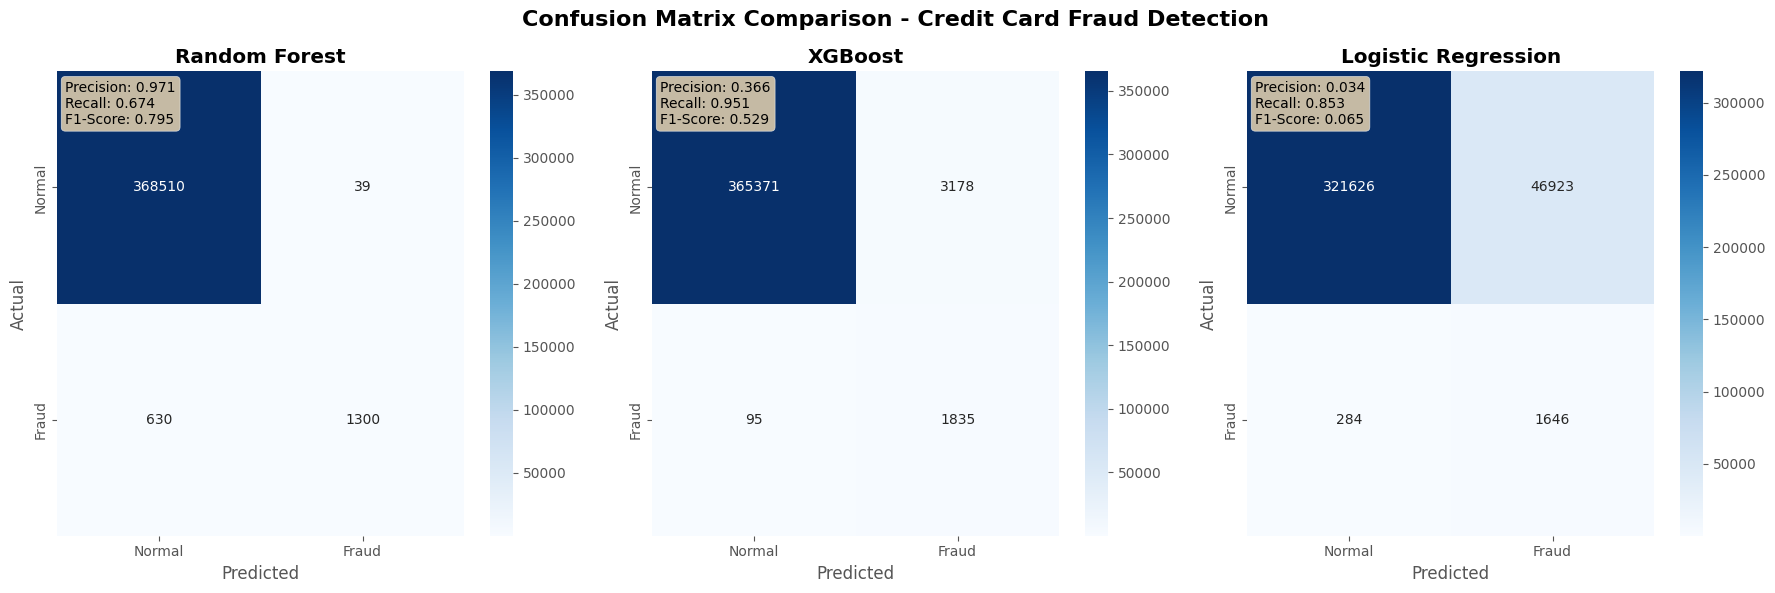

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

print("="*60)
print("CONFUSION MATRIX ANALYSIS")
print("="*60)

# Check which models are available
available_models = []
if 'rf_pred' in locals():
    available_models.append(('Random Forest', rf_pred))
if 'xgb_pred' in locals():
    available_models.append(('XGBoost', xgb_pred))
if 'lr_pred' in locals():
    available_models.append(('Logistic Regression', lr_pred))

print(f"Available models: {len(available_models)}")

# Create subplots based on available models
n_models = len(available_models)
if n_models == 1:
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    axes = [ax]
elif n_models == 2:
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
else:
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

fig.suptitle('Confusion Matrix Comparison - Credit Card Fraud Detection',
             fontsize=16, fontweight='bold')

# Plot confusion matrices
for i, (name, pred) in enumerate(available_models):
    cm = confusion_matrix(y_test, pred)

    # Plot confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Normal', 'Fraud'],
                yticklabels=['Normal', 'Fraud'],
                ax=axes[i])

    axes[i].set_title(f'{name}', fontweight='bold')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

    # Calculate metrics
    tn, fp, fn, tp = cm.ravel()
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    # Add metrics text
    textstr = f'Precision: {precision:.3f}\nRecall: {recall:.3f}\nF1-Score: {f1:.3f}'
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
    axes[i].text(0.02, 0.98, textstr, transform=axes[i].transAxes,
                 fontsize=10, verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()

In [79]:
# Detailed Analysis
print("\n" + "="*60)
print("DETAILED PERFORMANCE ANALYSIS")
print("="*60)

performance_summary = []

for name, pred in available_models:
    print(f"\n--- {name} ---")
    cm = confusion_matrix(y_test, pred)
    tn, fp, fn, tp = cm.ravel()

    # Calculate all metrics
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    print(f"Confusion Matrix:")
    print(f"True Negatives (Normal correctly): {tn:,}")
    print(f"False Positives (Normal as Fraud): {fp:,}")
    print(f"False Negatives (Fraud as Normal): {fn:,}")
    print(f"True Positives (Fraud correctly): {tp:,}")

    print(f"\nPerformance Metrics:")
    print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
    print(f"Precision: {precision:.4f} ({precision*100:.2f}%)")
    print(f"Recall: {recall:.4f} ({recall*100:.2f}%)")
    print(f"F1-Score: {f1:.4f}")

    total_fraud = tp + fn
    total_normal = tn + fp

    print(f"\nBusiness Impact:")
    print(f"Total fraud cases: {total_fraud:,}")
    print(f"Fraud caught: {tp:,} ({tp/total_fraud*100:.1f}%)")
    print(f"Fraud missed: {fn:,} ({fn/total_fraud*100:.1f}%)")
    print(f"False alarms: {fp:,} ({fp/total_normal*100:.2f}% of normal transactions)")

    performance_summary.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'False_Positives': fp,
        'False_Negatives': fn
    })



DETAILED PERFORMANCE ANALYSIS

--- Random Forest ---
Confusion Matrix:
True Negatives (Normal correctly): 368,510
False Positives (Normal as Fraud): 39
False Negatives (Fraud as Normal): 630
True Positives (Fraud correctly): 1,300

Performance Metrics:
Accuracy: 0.9982 (99.82%)
Precision: 0.9709 (97.09%)
Recall: 0.6736 (67.36%)
F1-Score: 0.7954

Business Impact:
Total fraud cases: 1,930
Fraud caught: 1,300 (67.4%)
Fraud missed: 630 (32.6%)
False alarms: 39 (0.01% of normal transactions)

--- XGBoost ---
Confusion Matrix:
True Negatives (Normal correctly): 365,371
False Positives (Normal as Fraud): 3,178
False Negatives (Fraud as Normal): 95
True Positives (Fraud correctly): 1,835

Performance Metrics:
Accuracy: 0.9912 (99.12%)
Precision: 0.3660 (36.60%)
Recall: 0.9508 (95.08%)
F1-Score: 0.5286

Business Impact:
Total fraud cases: 1,930
Fraud caught: 1,835 (95.1%)
Fraud missed: 95 (4.9%)
False alarms: 3,178 (0.86% of normal transactions)

--- Logistic Regression ---
Confusion Matrix:
T

# Final Model Comparison & Selection for Deployment

🏆 FINAL MODEL COMPARISON & DEPLOYMENT SELECTION

📊 COMPREHENSIVE MODEL COMPARISON
--------------------------------------------------------------------------------
                 Model  Accuracy  Precision  Recall  F1-Score  ROC-AUC  \
0        Random Forest    0.9982     0.9709  0.6736    0.7954   0.9852   
1              XGBoost    0.9912     0.3660  0.9508    0.5286   0.9978   
2  Logistic Regression    0.8726     0.0339  0.8528    0.0652   0.9365   

     Status  
0  Original  
1  Original  
2  Original  

Model                     Status   Accuracy   Precision   Recall   F1-Score  ROC-AUC 
--------------------------------------------------------------------------------
Random Forest             Original 0.9982     0.9709      0.6736   0.7954    0.9852  
XGBoost                   Original 0.9912     0.3660      0.9508   0.5286    0.9978  
Logistic Regression       Original 0.8726     0.0339      0.8528   0.0652    0.9365  


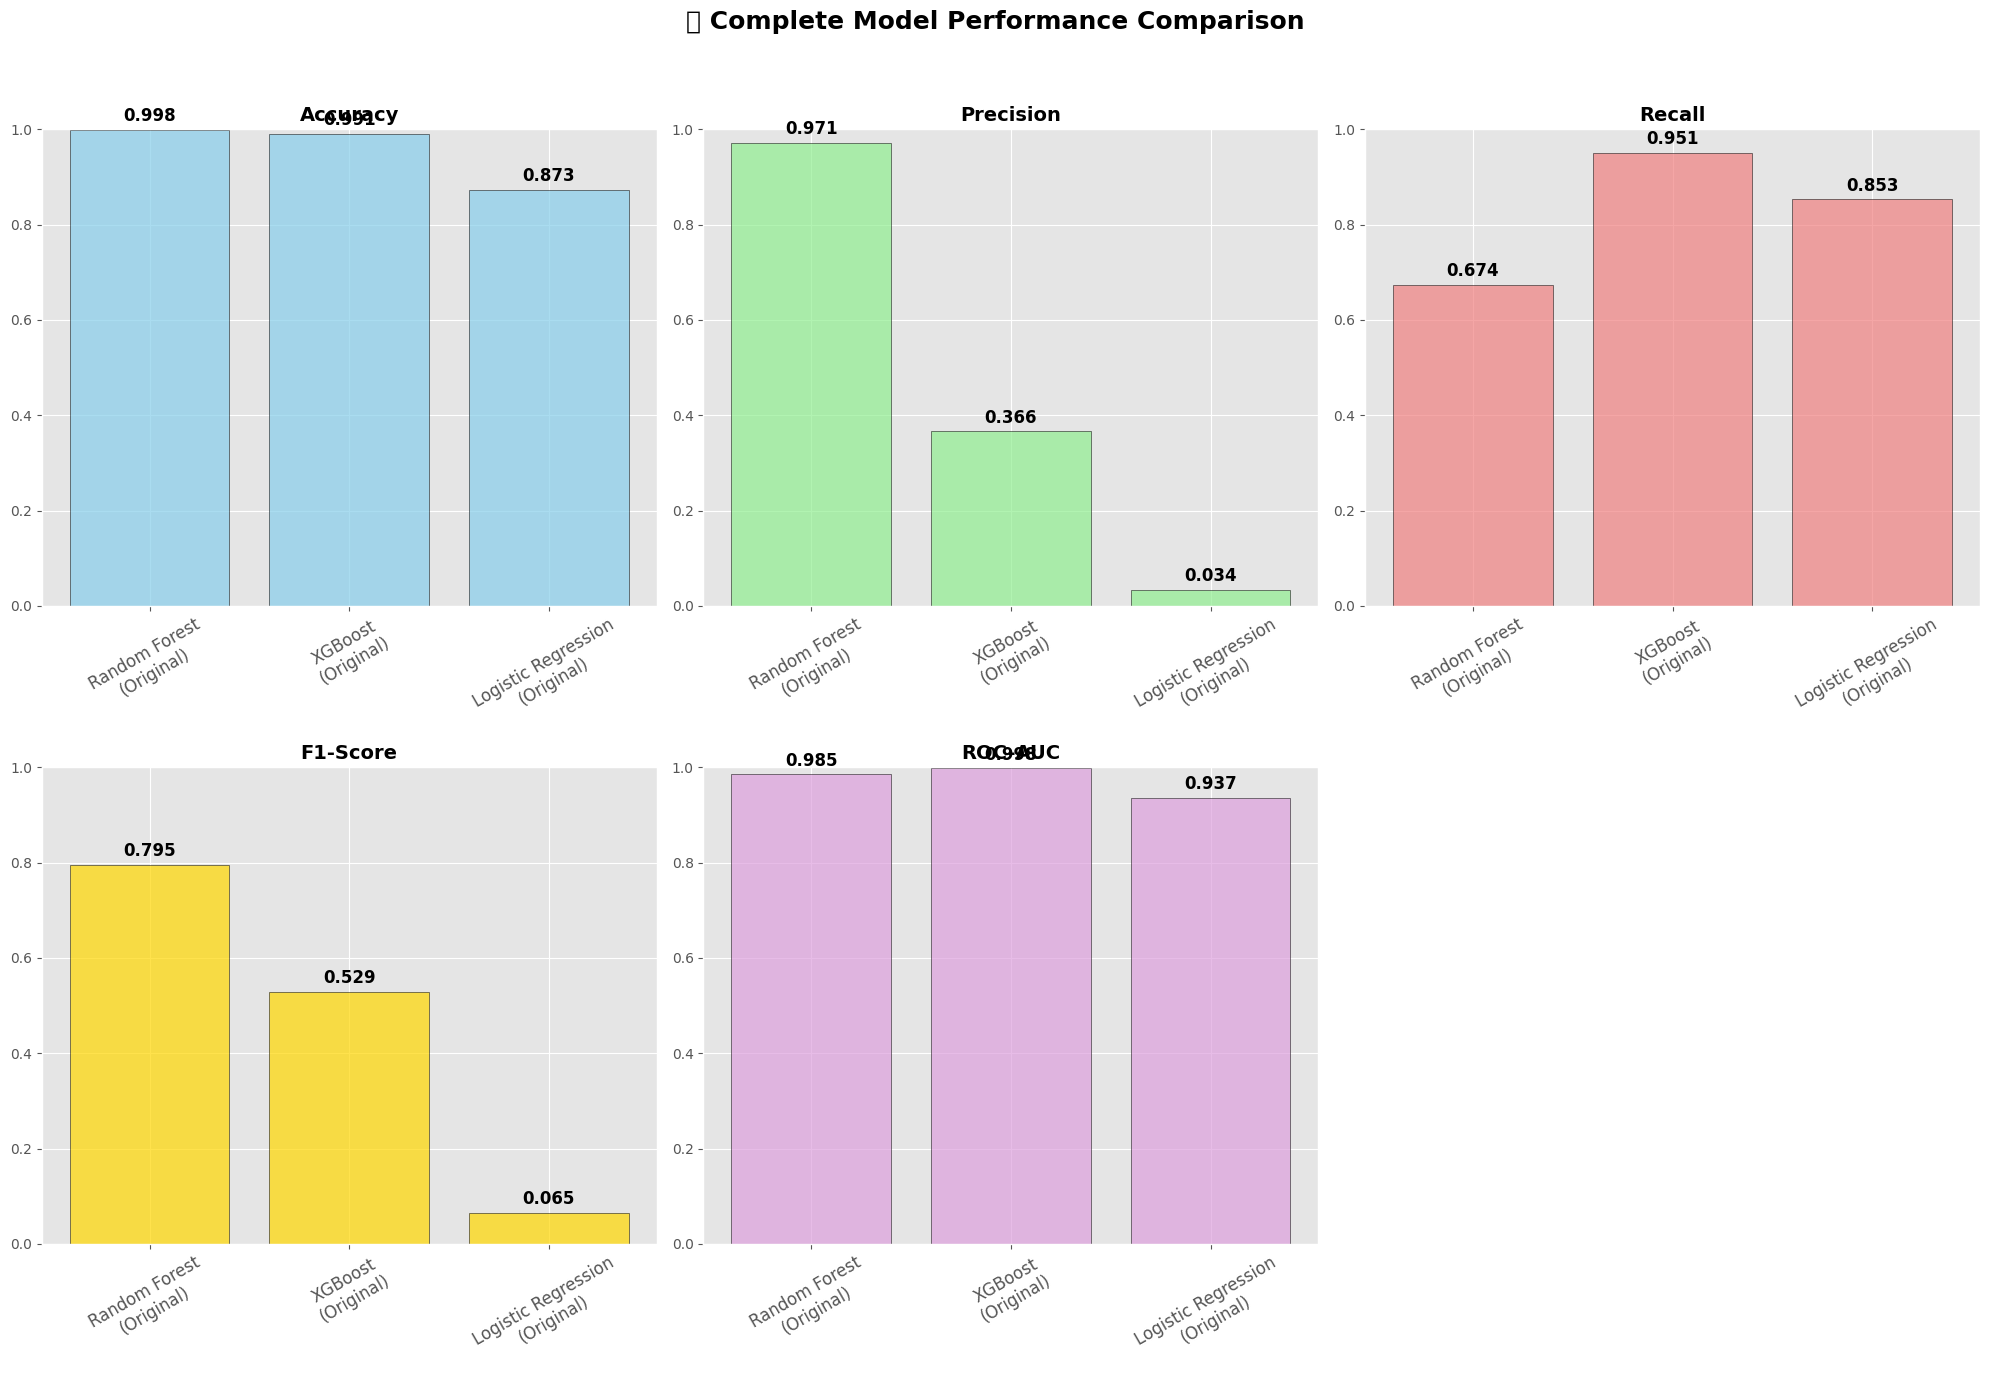

In [80]:
print("🏆 FINAL MODEL COMPARISON & DEPLOYMENT SELECTION")
print("="*80)

# Collect all model results
models_results = []

# Random Forest
if 'rf_pred' in locals():
    rf_accuracy = accuracy_score(y_test, rf_pred)
    rf_precision = precision_score(y_test, rf_pred)
    rf_recall = recall_score(y_test, rf_pred)
    rf_f1 = f1_score(y_test, rf_pred)
    rf_auc = roc_auc_score(y_test, rf_pred_proba) if 'rf_pred_proba' in locals() else 0

    models_results.append({
        'Model': 'Random Forest',
        'Accuracy': rf_accuracy,
        'Precision': rf_precision,
        'Recall': rf_recall,
        'F1-Score': rf_f1,
        'ROC-AUC': rf_auc,
        'Status': 'Original'
    })

# XGBoost
if 'xgb_pred' in locals():
    xgb_accuracy = accuracy_score(y_test, xgb_pred)
    xgb_precision = precision_score(y_test, xgb_pred)
    xgb_recall = recall_score(y_test, xgb_pred)
    xgb_f1 = f1_score(y_test, xgb_pred)
    xgb_auc = roc_auc_score(y_test, xgb_pred_proba) if 'xgb_pred_proba' in locals() else 0

    models_results.append({
        'Model': 'XGBoost',
        'Accuracy': xgb_accuracy,
        'Precision': xgb_precision,
        'Recall': xgb_recall,
        'F1-Score': xgb_f1,
        'ROC-AUC': xgb_auc,
        'Status': 'Original'
    })

# Logistic Regression (Original)
if 'lr_pred' in locals():
    lr_accuracy = accuracy_score(y_test, lr_pred)
    lr_precision = precision_score(y_test, lr_pred)
    lr_recall = recall_score(y_test, lr_pred)
    lr_f1 = f1_score(y_test, lr_pred)
    lr_auc = roc_auc_score(y_test, lr_pred_proba) if 'lr_pred_proba' in locals() else 0

    models_results.append({
        'Model': 'Logistic Regression',
        'Accuracy': lr_accuracy,
        'Precision': lr_precision,
        'Recall': lr_recall,
        'F1-Score': lr_f1,
        'ROC-AUC': lr_auc,
        'Status': 'Original'
    })

# Logistic Regression (Tuned) - if available
if 'lr_tuned_pred' in locals():
    lr_tuned_accuracy = accuracy_score(y_test, lr_tuned_pred)
    lr_tuned_precision = precision_score(y_test, lr_tuned_pred)
    lr_tuned_recall = recall_score(y_test, lr_tuned_pred)
    lr_tuned_f1 = f1_score(y_test, lr_tuned_pred)
    lr_tuned_auc = roc_auc_score(y_test, lr_tuned_pred_proba) if 'lr_tuned_pred_proba' in locals() else 0

    models_results.append({
        'Model': 'Logistic Regression',
        'Accuracy': lr_tuned_accuracy,
        'Precision': lr_tuned_precision,
        'Recall': lr_tuned_recall,
        'F1-Score': lr_tuned_f1,
        'ROC-AUC': lr_tuned_auc,
        'Status': 'Tuned'
    })
# Create comprehensive comparison DataFrame
df_results = pd.DataFrame(models_results)
print("\n📊 COMPREHENSIVE MODEL COMPARISON")
print("-" * 80)
print(df_results.round(4))

# Detailed Performance Table
print(f"\n{'Model':<25} {'Status':<8} {'Accuracy':<10} {'Precision':<11} {'Recall':<8} {'F1-Score':<9} {'ROC-AUC':<8}")
print("-" * 80)
for _, row in df_results.iterrows():
    print(f"{row['Model']:<25} {row['Status']:<8} {row['Accuracy']:<10.4f} {row['Precision']:<11.4f} {row['Recall']:<8.4f} {row['F1-Score']:<9.4f} {row['ROC-AUC']:<8.4f}")
# Create visualization comparison
fig, axes = plt.subplots(2, 3, figsize=(20, 14))
fig.suptitle('📊 Complete Model Performance Comparison', fontsize=18, fontweight='bold')

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
colors = ['skyblue', 'lightgreen', 'lightcoral', 'gold', 'plum']

# Flatten axes for easier indexing
axes = axes.flatten()

# Plot each metric
for i, metric in enumerate(metrics):
    model_names = [f"{row['Model']}\n({row['Status']})" for _, row in df_results.iterrows()]
    values = df_results[metric].values

    bars = axes[i].bar(model_names, values, color=colors[i], alpha=0.7, edgecolor='black')
    axes[i].set_title(f'{metric}', fontweight='bold', fontsize=14)
    axes[i].set_ylim(0, 1)
    axes[i].tick_params(axis='x', rotation=30, labelsize=12)

    # Add value labels on bars
    for bar, value in zip(bars, values):
        axes[i].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                     f'{value:.3f}', ha='center', va='bottom', fontweight='bold', fontsize=12)

# Hide any unused subplot (if metrics < 6)
for j in range(len(metrics), len(axes)):
    axes[j].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()





In [81]:
# Performance Rankings
print("\n" + "="*80)
print("🏅 PERFORMANCE RANKINGS")
print("="*80)

# Rank by each metric
for metric in ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']:
    sorted_models = df_results.sort_values(metric, ascending=False)
    print(f"\n🏆 {metric} Rankings:")
    for i, (_, row) in enumerate(sorted_models.iterrows(), 1):
        status_emoji = "🔧" if row['Status'] == 'Tuned' else "⚡"
        print(f"   {i}. {row['Model']} {status_emoji} - {row[metric]:.4f}")


🏅 PERFORMANCE RANKINGS

🏆 Accuracy Rankings:
   1. Random Forest ⚡ - 0.9982
   2. XGBoost ⚡ - 0.9912
   3. Logistic Regression ⚡ - 0.8726

🏆 Precision Rankings:
   1. Random Forest ⚡ - 0.9709
   2. XGBoost ⚡ - 0.3660
   3. Logistic Regression ⚡ - 0.0339

🏆 Recall Rankings:
   1. XGBoost ⚡ - 0.9508
   2. Logistic Regression ⚡ - 0.8528
   3. Random Forest ⚡ - 0.6736

🏆 F1-Score Rankings:
   1. Random Forest ⚡ - 0.7954
   2. XGBoost ⚡ - 0.5286
   3. Logistic Regression ⚡ - 0.0652

🏆 ROC-AUC Rankings:
   1. XGBoost ⚡ - 0.9978
   2. Random Forest ⚡ - 0.9852
   3. Logistic Regression ⚡ - 0.9365


## Model Selection

In [82]:
print("🎯 MODEL SELECTION FRAMEWORK")
print("="*80)

# Find best models for different scenarios
best_overall = df_results.loc[df_results['F1-Score'].idxmax()]
best_precision = df_results.loc[df_results['Precision'].idxmax()]
best_recall = df_results.loc[df_results['Recall'].idxmax()]
best_auc = df_results.loc[df_results['ROC-AUC'].idxmax()]

print(f"\n🏆 RECOMMENDED MODELS BY USE CASE:")
print(f"\n1. 🎯 BALANCED PERFORMANCE (Production Ready):")
print(f"   → {best_overall['Model']} ({best_overall['Status']})")
print(f"   → F1-Score: {best_overall['F1-Score']:.4f}")
print(f"   → Use when: Need good balance of precision and recall")

print(f"\n2. 🛡️ CONSERVATIVE APPROACH (Minimize False Alarms):")
print(f"   → {best_precision['Model']} ({best_precision['Status']})")
print(f"   → Precision: {best_precision['Precision']:.4f}")
print(f"   → Use when: Customer experience is critical")

print(f"\n3. 🔍 AGGRESSIVE DETECTION (Catch All Fraud):")
print(f"   → {best_recall['Model']} ({best_recall['Status']})")
print(f"   → Recall: {best_recall['Recall']:.4f}")
print(f"   → Use when: Fraud prevention is top priority")

print(f"\n4. 📈 BEST DISCRIMINATOR (Highest AUC):")
print(f"   → {best_auc['Model']} ({best_auc['Status']})")
print(f"   → ROC-AUC: {best_auc['ROC-AUC']:.4f}")
print(f"   → Use when: Model confidence is important")


🎯 MODEL SELECTION FRAMEWORK

🏆 RECOMMENDED MODELS BY USE CASE:

1. 🎯 BALANCED PERFORMANCE (Production Ready):
   → Random Forest (Original)
   → F1-Score: 0.7954
   → Use when: Need good balance of precision and recall

2. 🛡️ CONSERVATIVE APPROACH (Minimize False Alarms):
   → Random Forest (Original)
   → Precision: 0.9709
   → Use when: Customer experience is critical

3. 🔍 AGGRESSIVE DETECTION (Catch All Fraud):
   → XGBoost (Original)
   → Recall: 0.9508
   → Use when: Fraud prevention is top priority

4. 📈 BEST DISCRIMINATOR (Highest AUC):
   → XGBoost (Original)
   → ROC-AUC: 0.9978
   → Use when: Model confidence is important


##📌 Save the Trained Model for Deployment

Goal: Save the selected model after training so it can be used later for predictions without retraining. This is the final step after all modeling is done.

In [83]:
import joblib

# Select the model you want to deploy
deployment_model = best_overall  # The model chosen for deployment

# Save the model to a file
joblib.dump(deployment_model, 'fraud_detection_model.pkl')
print("✅ Model saved for deployment!")


✅ Model saved for deployment!
